/Users/leonardoraiz/Documents/Leonardo/FATEC/Aulas/IA/Outros/Aula 04 - Sistemas Especialistas /.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Formato das imagens de treino: (60000, 28, 28, 1)
Número de classes (dígitos): 10


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)


Iniciando o treinamento da CNN...
Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.7921 - loss: 0.6536 - val_accuracy: 0.9830 - val_loss: 0.0612
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9689 - loss: 0.1060 - val_accuracy: 0.9865 - val_loss: 0.0484
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9790 - loss: 0.0743 - val_accuracy: 0.9892 - val_loss: 0.0403
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9828 - loss: 0.0570 - val_accuracy: 0.9897 - val_loss: 0.0349
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9849 - loss: 0.0491 - val_accuracy: 0.9898 - val_loss: 0.0358

Treinamento concluído!

Acurácia no teste (imagens que ele nunca viu): 98.96%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━

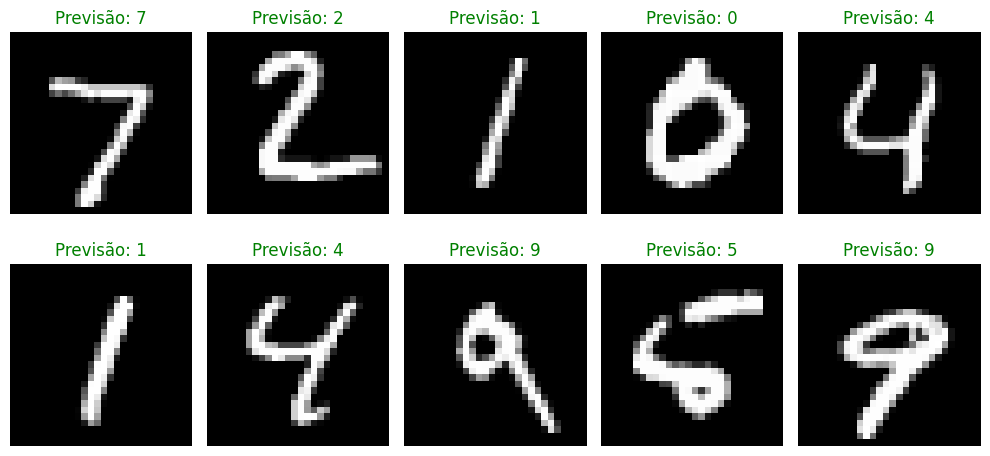

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

# --- Parte 1: Carregar os dados ---
# MNIST: 60.000 imagens de treino e 10.000 de teste de dígitos (0-9)
# O Keras já facilita o download
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# --- Parte 2: Pré-processamento ---
# Nossos modelos de ML precisam de números entre 0 e 1 (normalização)
# E as CNNs precisam saber a "profundidade" da imagem (1 para tons de cinza)
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Adiciona a dimensão do canal (ex: 28x28 -> 28x28x1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("Formato das imagens de treino:", x_train.shape)
print("Número de classes (dígitos):", len(np.unique(y_train)))

# --- Parte 3: Construir a Rede Neural Convolucional (CNN) ---
# Esta é a "mágica" de aprender a ver

modelo_cnn = keras.Sequential([
    # Input da imagem (28x28 pixels, 1 canal de cor)
    keras.Input(shape=(28, 28, 1)),

    # Camada Convolucional: Aprende a achar "features" (bordas, curvas)
    # Ela usa 32 "filtros" (olhos) diferentes
    layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),

    # Camada de Pooling: Reduz o tamanho da imagem para focar no que importa
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Outra camada convolucional para aprender features mais complexas
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),

    # "Achata" a imagem 2D para um vetor 1D para a rede neural final
    layers.Flatten(),

    # Camada Densa: Uma rede neural padrão para tomar a decisão final
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5), # Técnica para evitar "decoreba" (overfitting)

    # Camada de Saída: 10 neurônios (um para cada dígito), com softmax
    layers.Dense(10, activation="softmax")
])

modelo_cnn.summary()

# --- Parte 4: Treinar o Modelo ---
modelo_cnn.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

print("\nIniciando o treinamento da CNN...")
# Treinamos por 5 "épocas" (5 passagens pelos dados de treino)
history = modelo_cnn.fit(x_train, y_train,
                         batch_size=128,
                         epochs=5,
                         validation_split=0.1)

print("\nTreinamento concluído!")

# --- Parte 5: Avaliar e Testar ---
score = modelo_cnn.evaluate(x_test, y_test, verbose=0)
print(f"\nAcurácia no teste (imagens que ele nunca viu): {score[1]*100:.2f}%")

# Vamos ver uma previsão na prática
plt.figure(figsize=(10, 5))
for i in range(10):
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")

    # Pede ao modelo para "prever" o dígito
    previsao_raw = modelo_cnn.predict(np.expand_dims(x_test[i], 0))
    previsao_digito = np.argmax(previsao_raw)

    cor = 'green' if previsao_digito == y_test[i] else 'red'
    plt.title(f"Previsão: {previsao_digito}", color=cor)
    plt.axis("off")

plt.tight_layout()
plt.show()